### Inicio

In [114]:
from datetime import date
import os
os.environ["AWS_PROFILE"] = "men"
os.environ['AWS_DEFAULT_REGION'] = 'us-east-1'

In [ ]:
#!pip install langchain
#!pip install langchain_aws

   ---------------------------------------- 0.0/95.4 kB ? eta -:--:--
   ------------ --------------------------- 30.7/95.4 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 95.4/95.4 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/139.2 kB ? eta -:--:--
   ---------------------------------------- 139.2/139.2 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 32.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.9/13.3 MB 29.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.9/13.3 MB 23.3 MB/s eta 0:00:01
   ----------------- ---------------------- 5.9/13.3 MB 34.0 MB/s eta 0:00:01
   ---------------------------- ----------- 9.5/13.3 MB 43.4 MB/s eta 0:00:01
   ------------------------------------ --- 12.1/13.3 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 73.1 MB/s eta 0:00:01
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.7.0 requires botocore<1.31.65,>=1.31.16, but you have botocore 1.36.2 which is incompatible.


In [115]:
from langchain.prompts import PromptTemplate
from langchain_aws import BedrockLLM
from langchain_aws import ChatBedrock, ChatBedrockConverse
from langchain_core.output_parsers import StrOutputParser

import pandas as pd
import ast
import matplotlib.pyplot as plt

In [116]:
llm = ChatBedrockConverse(model="anthropic.claude-3-sonnet-20240229-v1:0", 
                          temperature=0.02, 
                          max_tokens=None)

In [117]:
def get_wimbledon_final():
    prompt_content = """
    Provide only information about the Wimbledon tennis final for the year {year}, strictly in this format:
    [<year>, "<winner>", "<runner_up>", <duration in hours, e.g., 3.5 or 4.25>]

    The Match Duration should be given in hours with decimals if necessary.
    Do not include additional information or explanations.
    If there is no available data fill the list with [<year>, None, None, None]
    """
    return PromptTemplate(
        input_variables=["year"],
        template=prompt_content,
    )

In [118]:
get_wimbledon_final = get_wimbledon_final() | llm | StrOutputParser()

print(get_wimbledon_final.invoke({"year": "2023"}))

[2023, None, None, None]


In [119]:
results = []

for year in range(1968, 2025):
    response = get_wimbledon_final.invoke({"year": str(year)})
    lista = ast.literal_eval(response)
    results.append(lista)

wimbledon_finals = pd.DataFrame(results, columns=["Year", "Winner", "Runner-Up", "Duration (Hours)"])

In [120]:
wimbledon_finals.loc[wimbledon_finals['Year'] == 2023, ['Winner', 'Runner-Up', 'Duration (Hours)']] = ['Carlos Alcaraz', 'Novak Djokovic', 4.7]
wimbledon_finals.loc[wimbledon_finals['Year'] == 2024, ['Winner', 'Runner-Up', 'Duration (Hours)']] = ['Carlos Alcaraz', 'Novak Djokovic', 2.45]
wimbledon_finals.tail()

,Year,Winner,Runner-Up,Duration (Hours)
52,2020,None,None,NaN
53,2021,Novak Djokovic,Matteo Berrettini,3.25
54,2022,Novak Djokovic,Nick Kyrgios,3.00
55,2023,Carlos Alcaraz,Novak Djokovic,4.70
56,2024,Carlos Alcaraz,Novak Djokovic,2.45


In [121]:
unique_players = pd.unique([player for player in wimbledon_finals['Winner'].dropna().tolist() + wimbledon_finals['Runner-Up'].dropna().tolist()])
unique_players_list = unique_players.tolist()
unique_players_list

C:\Users\Mateo Grisales\AppData\Local\Temp\ipykernel_19564\308255451.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_players = pd.unique([player for player in wimbledon_finals['Winner'].dropna().tolist() + wimbledon_finals['Runner-Up'].dropna().tolist()])


['Rod Laver',
 'John Newcombe',
 'Stan Smith',
 'Jan Kodes',
 'Jimmy Connors',
 'Arthur Ashe',
 'Billie Jean King',
 'Virgina Wade',
 'Bjorn Borg',
 'John McEnroe',
 'Boris Becker',
 'Pat Cash',
 'Stefan Edberg',
 'Michael Stich',
 'Andre Agassi',
 'Pete Sampras',
 'Richard Krajicek',
 'Goran Ivanisevic',
 'Lleyton Hewitt',
 'Roger Federer',
 'Rafael Nadal',
 'Novak Djokovic',
 'Andy Murray',
 'Carlos Alcaraz',
 'Tony Roche',
 'Ken Rosewall',
 'Ilie Nastase',
 'Alex Metreveli',
 'Navratilova',
 'Betty Stove',
 'Roscoe Tanner',
 'Chris Lewis',
 'Connors',
 'Kevin Curren',
 'Ivan Lendl',
 'Jim Courier',
 'MaliVai Washington',
 'Cedric Pioline',
 'Patrick Rafter',
 'David Nalbandian',
 'Mark Philippoussis',
 'Andy Roddick',
 'Tomas Berdych',
 'Milos Raonic',
 'Marin Čilić',
 'Kevin Anderson',
 'Matteo Berrettini',
 'Nick Kyrgios']

In [122]:
len(unique_players)

48

In [123]:
def get_player_info():
    prompt_content = """
    Provide only information about the following tennis professional player {player}, strictly in this format:
    ["<name>", <birth year, e.g., 1998, 2002>, <height in m, e.g., 1.8, 2.01>, "<birth country in  ISO 3166-1 alpha-3, e.g., USA, FRA>"]

    The height should be given in hours with decimals if necessary.
    Do not include additional information or explanations.
    If there is no available data fill the list with ["<name>", None, None, None]
    """
    return PromptTemplate(
        input_variables=["player"],
        template=prompt_content,
    )

In [124]:
get_player_info = get_player_info() | llm | StrOutputParser()

print(get_player_info.invoke({"player": "Roger Federer"}))

["Roger Federer", 1981, 1.85, "CHE"]


In [125]:
results = []

for u in unique_players:
    response = get_player_info.invoke({"player": u})
    lista = ast.literal_eval(response)
    results.append(lista)

players = pd.DataFrame(results, columns=["Player", "Birth Year", "Height", "Country"])
players.head()

,Player,Birth Year,Height,Country
0,Rod Laver,1938.0,1.75,AUS
1,John Newcombe,1944.0,1.85,AUS
2,Stan Smith,1946.0,1.83,USA
3,Jan Kodes,1946.0,1.83,CZE
4,Jimmy Connors,1952.0,1.83,USA


In [126]:
players = players.dropna(subset=['Birth Year'])
players['Birth Year'] = players['Birth Year'].astype(int)
players = players.sort_values(by='Birth Year')
players

,Player,Birth Year,Height,Country
25,Ken Rosewall,1934,1.75,AUS
0,Rod Laver,1938,1.75,AUS
5,Arthur Ashe,1943,1.88,USA
6,Billie Jean King,1943,1.68,USA
1,John Newcombe,1944,1.85,AUS
7,Virginia Wade,1945,1.73,GBR
24,Tony Roche,1945,1.83,AUS
2,Stan Smith,1946,1.83,USA
3,Jan Kodes,1946,1.83,CZE
26,Ilie Nastase,1946,1.83,ROU


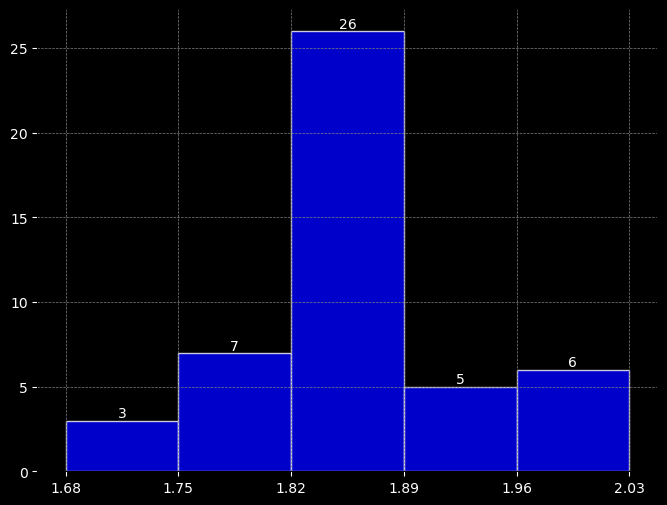

In [127]:
# Crear un histograma con las frecuencias sobre cada barra y eje X coincidiendo con los bins
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(players['Height'], bins=5, color='blue', edgecolor='white', alpha=0.8)

# Añadir las frecuencias encima de cada barra
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i],
             str(int(n[i])), ha='center', va='bottom', fontsize=10, color='white')

# Personalizar el gráfico
#plt.title('Distribución de la Altura de los Jugadores', fontsize=14, color='white')
#plt.xlabel('Altura (cm)', fontsize=12, color='white')
#plt.ylabel('Frecuencia', fontsize=12, color='white')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Personalizar los ticks del eje X para que coincidan con los bins
plt.xticks(ticks=bins, fontsize=10, color='white')

# Establecer fondo negro y colores blancos para texto y ejes
plt.gca().set_facecolor('black')
plt.gca().tick_params(colors='white')
plt.gcf().patch.set_facecolor('black')

# Mostrar el gráfico
plt.show()


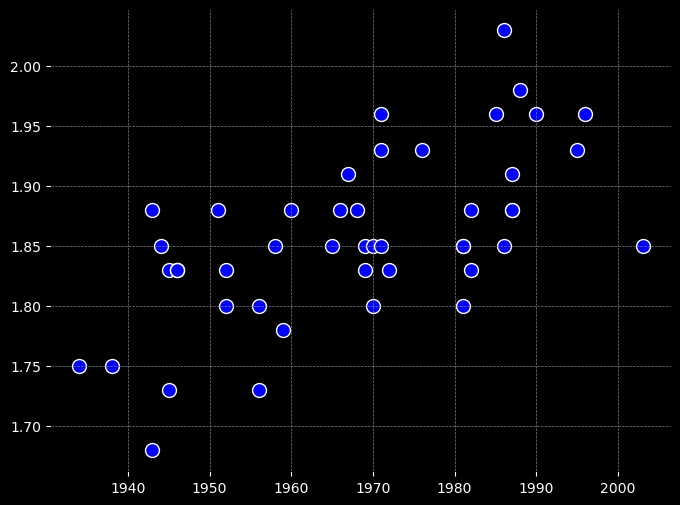

In [128]:
# Crear un gráfico de dispersión entre Birth Year y Height del DataFrame players con fondo negro
plt.figure(figsize=(8, 6))
plt.scatter(players['Birth Year'], players['Height'], color='blue', edgecolors='white', s=100, alpha=1)

# Personalizar el gráfico
#plt.title('Birth Year vs Height from Wimbledon Finalists (Open Era)', fontsize=14, color='white')
#plt.xlabel('Birth Year', fontsize=12, color='white')
#plt.ylabel('Height (m)', fontsize=12, color='white')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Establecer fondo negro y colores blancos para texto y ejes
plt.gca().set_facecolor('black')
plt.gca().tick_params(colors='white')
plt.gcf().patch.set_facecolor('black')

# Mostrar el gráfico
plt.show()


In [129]:
players.to_csv('players.csv', index=False)
wimbledon_finals.to_csv('wimbledon_finals.csv', index=False)